# Clone Portal users, groups and content

https://developers.arcgis.com/python/sample-notebooks/clone-portal-users-groups-and-content/

This sample notebook can be used for cloning a portal, from say, a staging to a production environment. It clones the users, groups and the content. It does not copy over services though, and works at the tier of portal items.

In [1]:
from arcgis.gis import GIS
from IPython.display import display
from getpass import getpass

In [2]:
source_password = getpass()
source_portal_url = "https://desarrollocatastro12.esri.co/portal"
# source_portal_url = "http://www.arcgis.com"
# source_admin_username = 'catastroadmin2'
source_admin_username = 'adminsgcv2'
# source_admin_username = 'renemorenow'
gis_source = GIS(source_portal_url, source_admin_username, source_password)


In [3]:
print(gis_source.url, gis_source.users.me.username)

https://desarrollocatastro12.esri.co/portal adminsgcv2


# Users:

In [6]:
#!esri_ & !admin
source_users = gis_source.users.search('!esri_ & !admin & !arcgis & !catreg')
for user in source_users:
    print(user.username + "\t:\t" + user.fullName + "\t:\t" + str(user.role))
    # print(user.username + "\t:\t" + str(user.role))

consultacatasia	:	Consultas Catasia	:	org_user
coordinador_dos_actualizacion	:	Coordinador Dos Actualizacion	:	org_user
coordinador_uno_actualizacion	:	Coord. Lucas Ibañez Actualizacion	:	org_user
editor_geografico_cuatro	:	E.G. Johana R. Actualizacion	:	org_user
editor_geografico_dos	:	E.G. Ricardo Catrillon Actualizacion	:	org_user
editor_geografico_tres	:	E.G. Lorena Rojas Actualizacion	:	org_user
editor_geografico_uno	:	E.G Lucas Ibañez Actualizacion	:	org_user
ejecutor1	:	Jacobo Ejecutor	:	org_user
ejecutor2	:	Lorena Ejecutor	:	org_user
ejecutor3	:	J. Sebastian Ejecutor	:	org_user
ejecutor4	:	Ricardo Ejecutor	:	org_user
ejecutor5	:	M.A Ejecutor	:	org_user
ejecutor7	:	Ejecutor 7 SACM	:	org_user
reconocedor_cinco_actualizacion	:	Reconocedor Cinco Actualizacion	:	org_user
reconocedor_cuatro_actualizacion	:	Rec. Johana R. Actualizacion	:	org_user
reconocedor_dos_actualizacion	:	Rec. Andres Riapira Actualizacion	:	org_user
reconocedor_nueve_actualizacion	:	Reconocedor Nueve Actualizaci

In [ ]:
print("Cantidad de usuarios: " + str(len(source_users)))

In [9]:
# filter out system and initial administrator accounts
target_users = target.users.search('!esri_ & !admin & !system_publisher')
target_users

[]

In [5]:
source_groups = gis_source.groups.search()
for group in source_groups:
    if "EJECUTORES"  in group.title or "SUPERVISORES"  in group.title:
        # print(group.user_list())
        for user in group.user_list()["users"]:
            print("Rol: %s,  Nombre: %s,  Usuario: %s,  Contraseña: %s" %(group.title, user["fullName"], user["username"], ""))


Rol: EJECUTORES_08638,  Nombre: Administrador Catastro 3.0,  Usuario: adminsgcv2,  Contraseña: 
Rol: EJECUTORES_08638,  Nombre: Ejecutor Dos Sabanalarga,  Usuario: ejecutor_dos_sabanalarga,  Contraseña: 
Rol: EJECUTORES_08638,  Nombre: Ejecutor Uno Sabanalarga,  Usuario: ejecutor_uno_sabanalarga,  Contraseña: 
Rol: EJECUTORES_08638,  Nombre: William Moreno,  Usuario: wmoreno,  Contraseña: 
Rol: EJECUTORES_41298,  Nombre: Administrador Catastro 3.0,  Usuario: adminsgcv2,  Contraseña: 
Rol: EJECUTORES_41298,  Nombre: Ejecutor Dos Garzon,  Usuario: ejecutor_dos_garzon,  Contraseña: 
Rol: EJECUTORES_41298,  Nombre: Ejecutor Uno Garzon,  Usuario: ejecutor_uno_garzon,  Contraseña: 
Rol: EJECUTORES_41298,  Nombre: William Moreno,  Usuario: wmoreno,  Contraseña: 
Rol: EJECUTORES_54001,  Nombre: Administrador Catastro 3.0,  Usuario: adminsgcv2,  Contraseña: 
Rol: EJECUTORES_54001,  Nombre: Ejecutor Dos Cucuta,  Usuario: ejecutor_dos_cucuta,  Contraseña: 
Rol: EJECUTORES_54001,  Nombre: Ejecutor

# Remove existing users from target portal:

In [16]:
for source_user in source_users:
    try:
        target_user = target.users.get(source_user.username)
        if target_user is not None:
            print('Deleting user: ' + target_user.fullName)
            target_user.reassign_to(target_admin_username)
            target_user.delete()
    except:
        print('User {} does not exist in Target Portal'.format(source_user.username))

Deleting user: Ejecutor Uno
Deleting user: Ejecutor2 Dos
Deleting user: Alfredo Alarcon
Deleting user: sgc integracion
Deleting user: super user
Deleting user: Supervisor Uno
Deleting user: Wilson Hernandez
Deleting user: William Moreno


# Copy Users:

In [22]:
def copy_user(target_portal, source_user, password):
    # See if the user has firstName and lastName properties
    try:
        first_name = source_user.firstName
        last_name = source_user.lastName
    except:
        # if not, split the fullName
        full_name = source_user.fullName
        first_name = full_name.split()[0]
        try:
            last_name = full_name.split()[1]
        except:
            last_name = 'NoLastName'

    try:
        print("create user:")
        target_user = target_portal.users.create(source_user.username, password, first_name, 
                                                 last_name, "wmoreno@esri.co",#source_user.email, 
                                                 source_user.description, source_user.role)
        print("user created")

        # update user properties
        print("update user:")
        target_user.update(source_user.access, source_user.preferredView,
                           source_user.description, source_user.tags
                           #,source_user.get_thumbnail_link()
                           #,culture=source_user.culture
                           ,region=source_user.region
                           )
        print("user updated")
        return target_user
    
    except Exception as Ex:
        print(str(Ex))
        print("Unable to create user "+ source_user.username)
        return None

In [23]:
for user in source_users:
    print("Creating user: " + user.username)
    copy_user(target, user, 'Esrico2021$')

Creating user: ejecutor1
Creating user: ejecutor2
Creating user: jalarcon
Creating user: sgcintegracion
Creating user: superuser
Creating user: supervisor1
Creating user: whernandez
Creating user: wmoreno


In [24]:
target_users = target.users.search()
target_users

[<User username:adminsgcv2>,
 <User username:ejecutor1>,
 <User username:ejecutor2>,
 <User username:jalarcon>,
 <User username:portaladmin>,
 <User username:sgcintegracion>,
 <User username:superuser>,
 <User username:supervisor1>,
 <User username:whernandez>,
 <User username:wmoreno>]

# Groups:

In [ ]:
# filter out system created groups
source_groups = gis_source.groups.search("!owner:esri_* & !Basemaps")
source_groups

In [ ]:
target_groups = target.groups.search("!owner:esri_* & !Basemaps")
target_groups

In [ ]:
for tg in target_groups:
    for sg in source_groups:
        if sg.title == tg.title and (not tg.owner.startswith('esri_')):
            print("Cleaning up group {} in target Portal...".format(tg.title))
            tg.delete()
            break

# Copy Groups:

In [ ]:
import tempfile

GROUP_COPY_PROPERTIES = ['title', 'description', 'tags', 'snippet', 'phone',
                         'access', 'isInvitationOnly']

def copy_group(target, gis_source, source_group):
    
    with tempfile.TemporaryDirectory() as temp_dir:
        try:
            target_group = {}

            for property_name in GROUP_COPY_PROPERTIES:
                target_group[property_name] = source_group[property_name]

            if source_group['access'] == 'org' and target.properties['portalMode'] == 'singletenant':
                #cloning from ArcGIS Online to ArcGIS Enterprise
                target_group['access'] = 'public'

            elif source_group['access'] == 'public'\
                 and gis_source.properties['portalMode'] == 'singletenant'\
                 and target.properties['portalMode'] == 'multitenant'\
                 and 'id' in target.properties:
                    #cloning from ArcGIS Enterprise to ArcGIS Online org
                    target_group['access'] = 'org'

            # Download the thumbnail (if one exists)
            thumbnail_file = None
            if 'thumbnail' in group:
                target_group['thumbnail'] = group.download_thumbnail(temp_dir)

            # Create the group in the target portal
            copied_group = target.groups.create_from_dict(target_group)

            # Reassign all groups to correct owners, add users, and find shared items
            members = group.get_members()
            if not members['owner'] == target_admin_username:
                copied_group.reassign_to(members['owner'])
            if members['users']:
                copied_group.add_users(members['users'])
            return copied_group
        except:
            print("Error creating " + source_group['title'])

In [ ]:
from IPython.display import display
for group in source_groups:
    target_group = copy_group(target, gis_source, group)
    if target_group:
        display(target_group)

In [ ]:
target_groups = target.groups.search()
target_groups

In [ ]:
group1 = target_groups[0]
group1.get_members()

# Searching Content...

In [30]:
content_search = gis_source.content.search("owner:"+gis_source.users.me.username, max_items=100)
content_search

[<Item title:"GIS Basic" type:Web Map owner:wilmoreno>,
 <Item title:"Mount Rainier Lahar Zones" type:Web Mapping Application owner:wilmoreno>,
 <Item title:"San Rafael Wilderness Area Application" type:Web Mapping Application owner:wilmoreno>,
 <Item title:"Mapa 1" type:Web Map owner:wilmoreno>,
 <Item title:"Sierra Nevada Alpine Climbing Routes" type:Web Map owner:wilmoreno>]

# Cloning Content
https://developers.arcgis.com/python/guide/cloning-content/


In [20]:
target_portal_url = "http://www.arcgis.com"
target_admin_username = 'renemorenow'
target_password = getpass()
gis_target = GIS(target_portal_url, target_admin_username, target_password)
print(gis_target.url, gis_target.users.me.username)

http://renemorenow.maps.arcgis.com renemorenow


### Clone all content gis_source:

In [ ]:
cloned_items = gis_target.content.clone_items(items=content_search)
cloned_items

### Clone one item:

In [33]:
for item in content_search:
    print(item.title, item.id)

GIS Basic d5fb8428e9c3474295c5a6f5b734779e
Mount Rainier Lahar Zones e2b26b417e70458db10212873d28f749
San Rafael Wilderness Area Application eb284c05e3f548c4bd5026b554c2dd5a
Mapa 1 c21a505f41fa47cb83befb50c9d18f41
Sierra Nevada Alpine Climbing Routes 890ddb489ae54d4995c1be1626c66edb


<Item title:"Mount Rainier Lahar Zones" type:Web Mapping Application owner:wilmoreno>
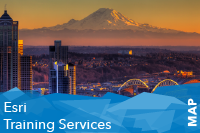

In [41]:
item2clone = gis_source.content.get("e2b26b417e70458db10212873d28f749")
item2clone

In [43]:
item2clone.id

'e2b26b417e70458db10212873d28f749'

<Item title:"LaharParcels" type:Feature Layer Collection owner:renemorenow>
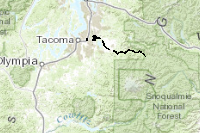

In [42]:
cloned_items = gis_target.content.clone_items(items=[item2clone])
cloned_items[0]